In [1]:
import numpy as np
import matplotlib
from skimage import io
from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split

In [2]:
path = "C:/Users/danib/Downloads/"
# tensorboard --logdir=logs

In [3]:
data_images = np.load(path + "train_data.npy")
data_labels = np.load(path + "train_labels.npy")
test_images = np.load(path + "test_data.npy")

In [4]:
train_images, validation_images, train_labels, validation_labels = train_test_split(data_images, data_labels, test_size=0.2)

In [5]:
train_labels.shape

(800,)

In [6]:
def show_10_nearest_images(train_images, image) :
    distante = np.sqrt(np.sum(np.power((train_images - image), 2), axis=1))

    sort_indexes = np.argsort(distante)

    sort_indexes = sort_indexes[ :10]

    ten_images = train_images[sort_indexes]

    for img in ten_images :
        io.imshow(img.reshape((28,28)).astype(np.uint8))
        io.show()

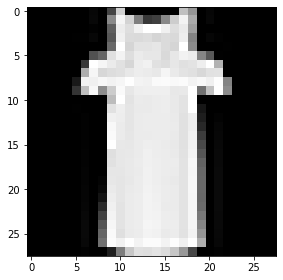

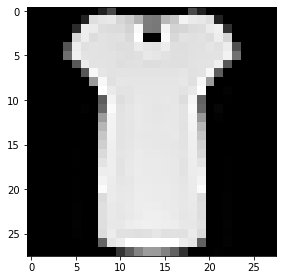

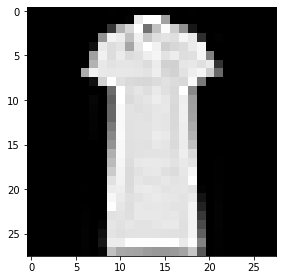

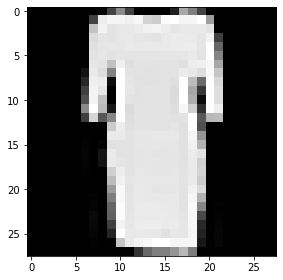

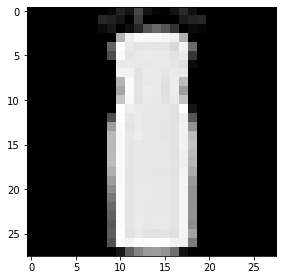

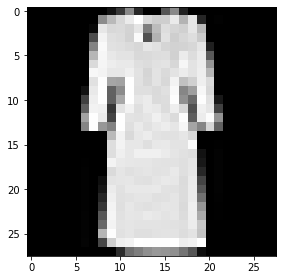

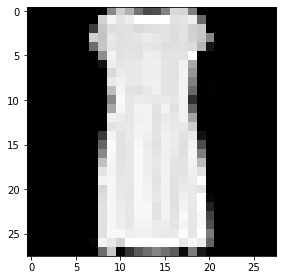

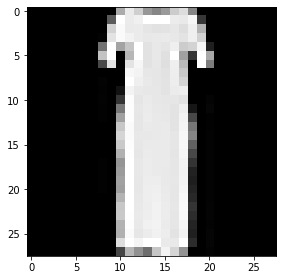

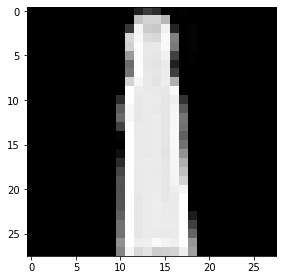

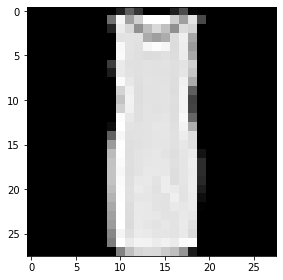

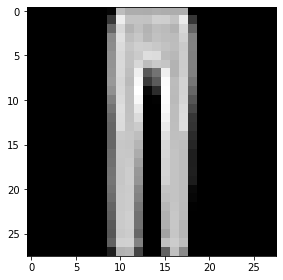

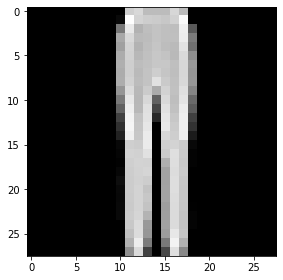

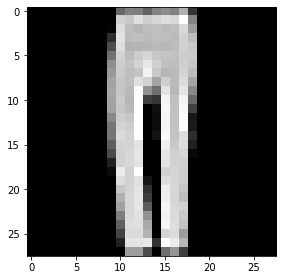

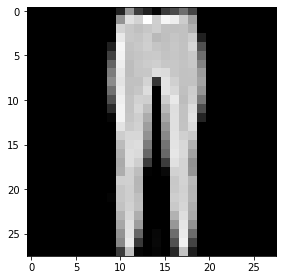

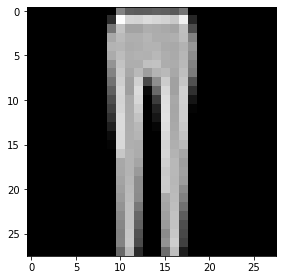

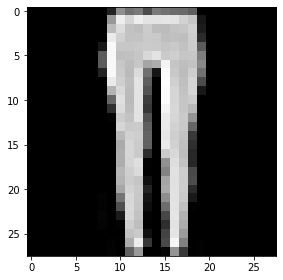

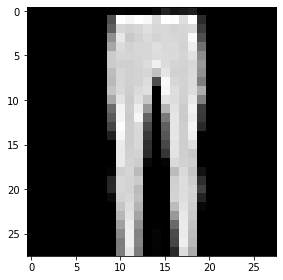

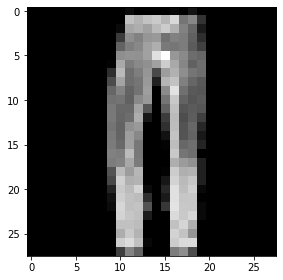

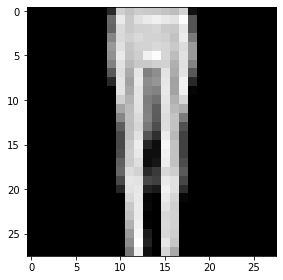

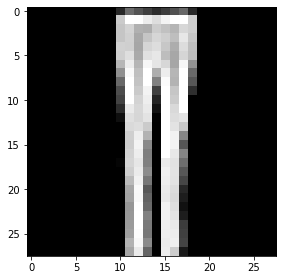

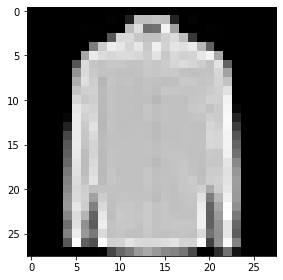

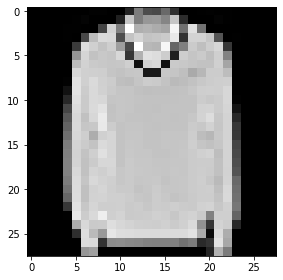

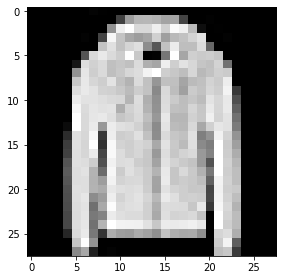

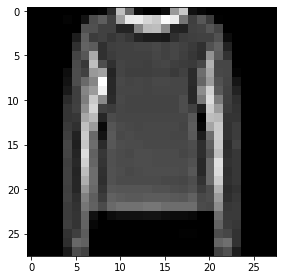

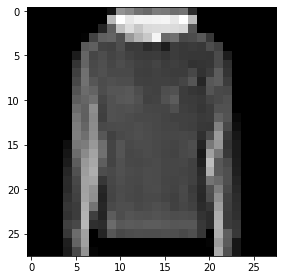

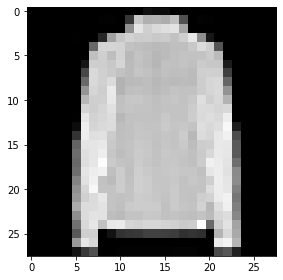

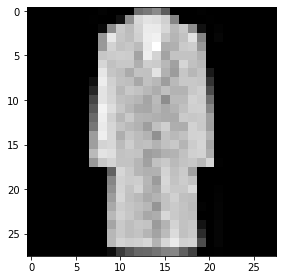

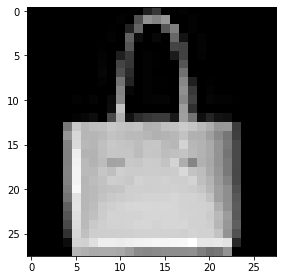

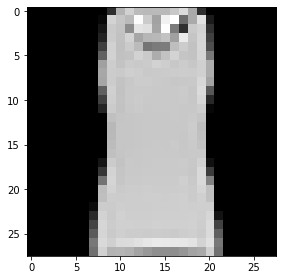

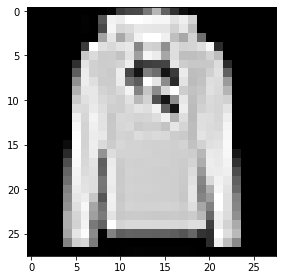

In [7]:
for i in range(3) :
    show_10_nearest_images(data_images, test_images[i])

In [ ]:
class Dropout(nn.Module):
    def __init__(self, p=0.5, inplace=False):
#         print(p)
        super(Dropout, self).__init__()
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, "
                             "but got {}".format(p))
        self.p = p
        self.inplace = inplace

    def forward(self, input):
        print(list(input.shape))
        return np.random.binomial([np.ones((len(input),np.array(list(input.shape))))],1-dropout_percent)[0] * (1.0/(1-self.p))

    def __repr__(self):
        inplace_str = ', inplace' if self.inplace else ''
        return self.__class__.__name__ + '(' \
            + 'p=' + str(self.p) \
            + inplace_str + ')'

class MyLinear(nn.Linear):
    def __init__(self, in_feats, out_feats, drop_p, bias=True):
        super(MyLinear, self).__init__(in_feats, out_feats, bias=bias)
        self.custom_dropout = Dropout(p=drop_p)

    def forward(self, input):
        dropout_value = self.custom_dropout(self.weight)
        return F.linear(input, dropout_value, self.bias)

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
train_images = np.loadtxt('./Downloads/data/train_images.txt')
train_labels = np.loadtxt('./Downloads/data/train_labels.txt')
test_images = np.loadtxt('./Downloads/data/test_images.txt')
test_labels = np.loadtxt('./Downloads/data/test_labels.txt')
train_images = np.digitize(train_images, np.linspace(0, 255, num=120, endpoint=True, retstep=False, dtype=None, axis=0), right=False)
test_images = np.digitize(test_images, np.linspace(0, 255, num=120, endpoint=True, retstep=False, dtype=None, axis=0), right=False)
im = train_images[0]
im = np.reshape(im,(28,28))
plt.imshow(im,cmap='gray')
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train_images, train_labels)
naive_bayes_model.predict(test_images)
naive_bayes_model.score(test_images, test_labels)
np.mean(naive_bayes_model.predict(test_images) == test_labels)

In [ ]:
def main() :
    ''' Am dat load la toate imaginile si de acum incep sa rezolv cerintele '''
    images = np.array([np.load(f"images/car_{nr}.npy") for nr in range(9)])


    print(f"b) suma valorilor pixelilor tuturor imaginilor este {np.sum(images)}")


    print(f"c) suma valorilor pixelilor fiecarei imagini este {np.sum(images, axis=(1, 2))}")


    print(f"d) indexul imaginii care are suma bitilor maxima e {np.argmax(np.sum(images, axis=(1, 2)))}")


    print("e) mean image is : ")
    mean_img = np.mean(images, axis=0)
    io.imshow(mean_img.astype(np.uint8))
    io.show()


    print(f"f) deviatia standard este {np.std(images)}")


    print(f"g) normalizati imaginile ! {images - mean_img / np.std(images)}")


    print("h) decuparea imaginilor : ")
    for img in images:
        io.imshow(img[200:301, 280:401].astype(np.uint8))
        io.show()


if __name__ == '__main__':
    main()